In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import sparsetools as sp
from matplotlib.colors import LogNorm

In [2]:
obs = sp.profile('obs/ibis_alma6mod_alma3syn_obs.nc')
fit = sp.profile('both/ibis_both_fit.nc')
mod = sp.model('both/ibis_both_mod.nc')
fit_6 = sp.profile('alma6/ibis_alma6_fit.nc')
mod_6 = sp.model('alma6/ibis_alma6_mod.nc')
fit_3 = sp.profile('alma3syn/ibis_alma3syn_fit.nc')
mod_3 = sp.model('alma3syn/ibis_alma3syn_mod.nc')
fit_0 = sp.profile('nlte/ibis_nlte_fit.nc')
mod_0 = sp.model('nlte/ibis_nlte_mod.nc')

profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
model::read: atmos type -> depth-stratifie

In [3]:
chi = np.sum((fit.dat-obs.dat)**2/fit.weights,(3))[0,:,:,0]
chi_6 = np.sum((fit_6.dat-obs.dat)**2/fit_6.weights,(3))[0,:,:,0]
chi_3 = np.sum((fit_3.dat-obs.dat)**2/fit_3.weights,(3))[0,:,:,0]
chi_0 = np.sum((fit_0.dat-obs.dat)**2/fit_0.weights,(3))[0,:,:,0]
ind = np.where(fit.weights[:,0]<1)[0]

In [4]:
x0,y0 = -87.0, 237.3
w = 0.096*334
x1,y1 = x0+w,y0+w

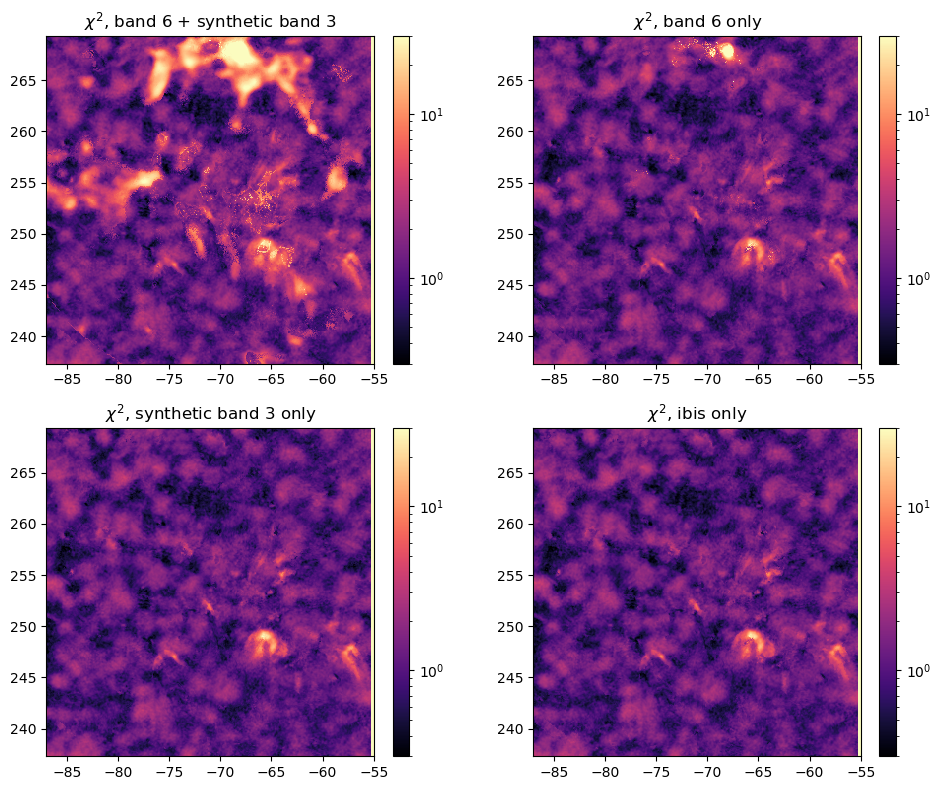

In [5]:
plt.figure(figsize=(10,8))
vmin,vmax = 0.3,30
plt.subplot(221)
plt.imshow(chi,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',norm=LogNorm(),vmin=vmin,vmax=vmax)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title(r'$\chi^2$, band 6 + synthetic band 3')
plt.subplot(222)
plt.imshow(chi_6,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',norm=LogNorm(),vmin=vmin,vmax=vmax)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title(r'$\chi^2$, band 6 only')
plt.subplot(223)
plt.imshow(chi_3,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',norm=LogNorm(),vmin=vmin,vmax=vmax)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title(r'$\chi^2$, synthetic band 3 only')
plt.subplot(224)
plt.imshow(chi_0,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',norm=LogNorm(),vmin=vmin,vmax=vmax)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title(r'$\chi^2$, ibis only')
plt.tight_layout()

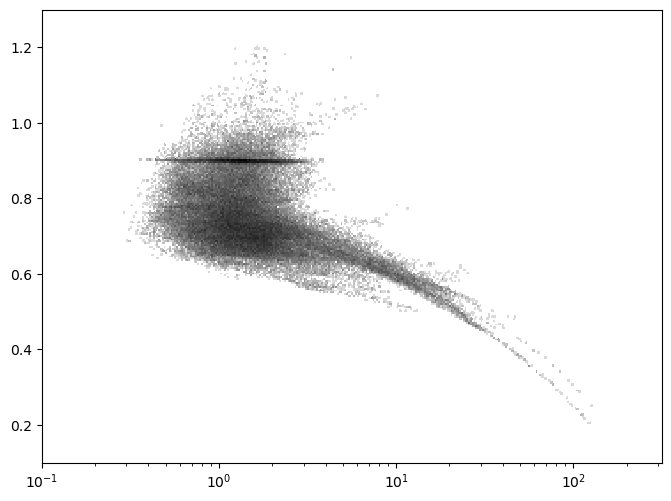

In [6]:
plt.figure(figsize=(8,6))
plt.hist2d(chi[:,:330].ravel(),(obs.dat[0,:,:330,-2,0]/obs.dat[0,:,:330,-1,0]*5900/7300).ravel(),\
           cmap='gist_yarg',bins=[10**np.linspace(-1,2.5,351),np.linspace(0.1,1.3,241)],norm=LogNorm())
plt.xscale('log')

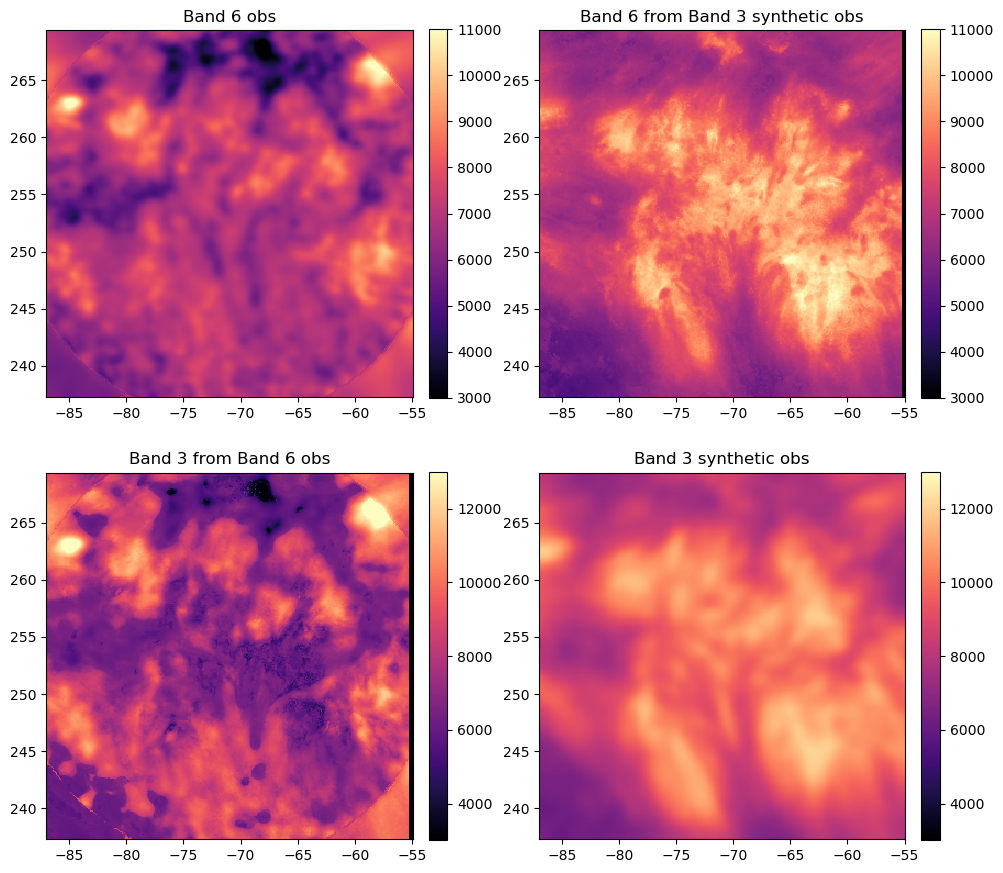

In [7]:
plt.figure(figsize=(10,9))
plt.subplot(221)
plt.imshow(obs.dat[0,:,:,-2,0]*5900,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=3000,vmax=11000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Band 6 obs')
plt.subplot(222)
plt.imshow(fit_3.dat[0,:,:,-2,0]*5900,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=3000,vmax=11000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Band 6 from Band 3 synthetic obs')
plt.subplot(223)
plt.imshow(fit_6.dat[0,:,:,-1,0]*7300,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=3000,vmax=13000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Band 3 from Band 6 obs')
plt.subplot(224)
plt.imshow(obs.dat[0,:,:,-1,0]*7300,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=3000,vmax=13000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Band 3 synthetic obs')
plt.tight_layout()

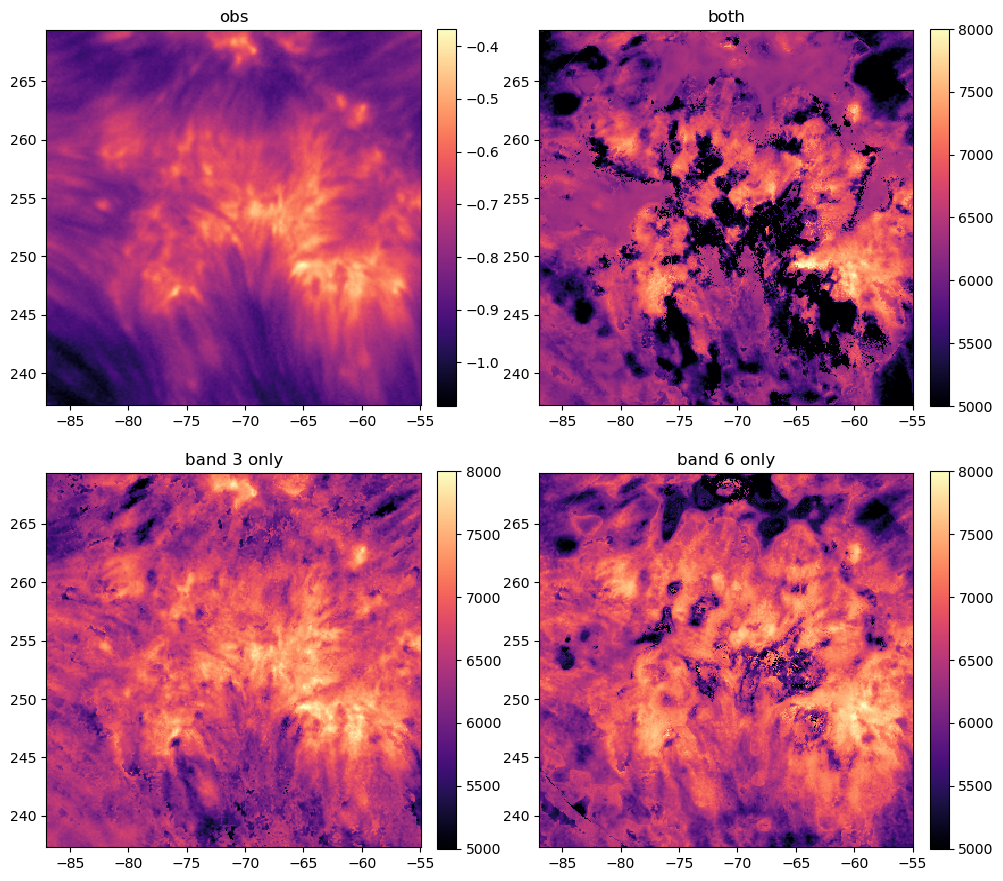

In [8]:
plt.figure(figsize=(10,9))
vmin,vmax = 5000,8000
plt.subplot(221)
plt.imshow(np.log10(obs.dat[0,:,:330,68,0]),extent=[x0,x1,y0,y1],cmap='magma',origin='lower')
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('obs')
plt.subplot(222)
plt.imshow(mod.temp[0,:,:330,15],extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('both')
plt.subplot(223)
plt.imshow(mod_3.temp[0,:,:330,14],extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('band 3 only')
plt.subplot(224)
plt.imshow(mod_6.temp[0,:,:330,13],extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('band 6 only')
plt.tight_layout()

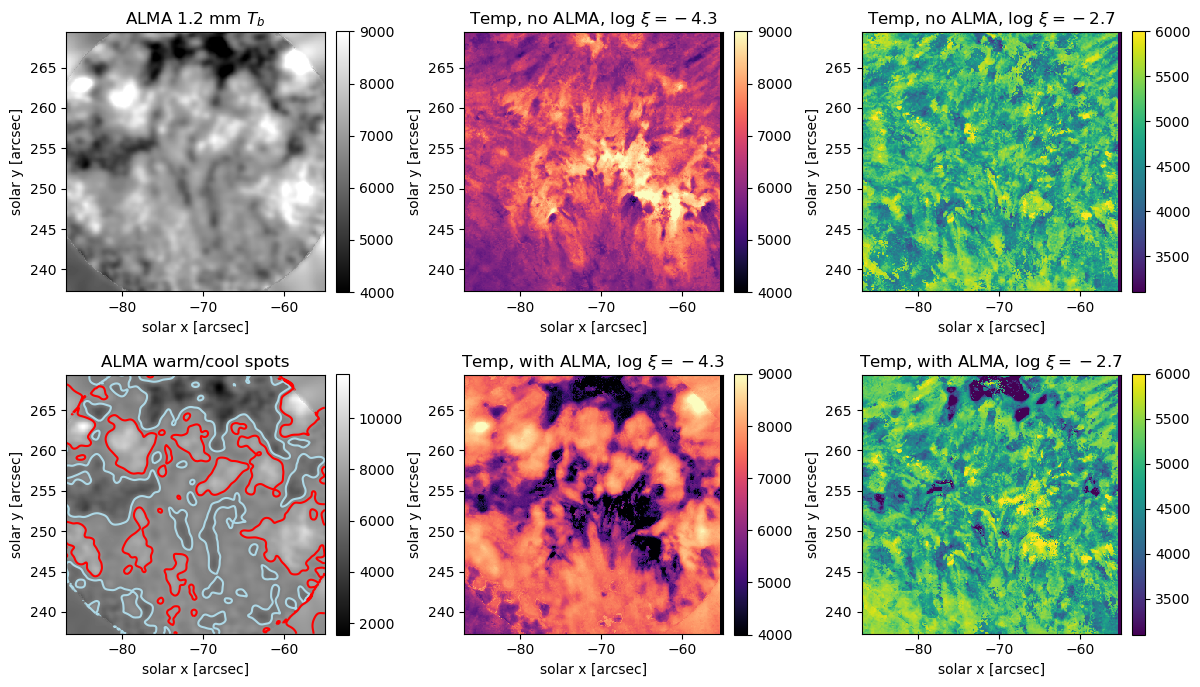

In [11]:
fig,ax = plt.subplots(2,3,figsize=(12,7),facecolor='w')
dim = 334*0.096
thres = 7000
buffer = 500
im00 = ax[0,0].imshow(obs.dat[0,:,:,-2,0]*5900,extent=[x0,x1,y0,y1],\
               cmap='gist_gray',origin='lower',vmin=4000,vmax=9000)
im10 = ax[1,0].imshow(obs.dat[0,:,:,-2,0]*5900,extent=[x0,x1,y0,y1],\
               cmap='gist_gray',origin='lower')
ax[1,0].contour(obs.dat[0,:,:,-2,0]*5900,[thres-buffer,thres+buffer],\
                extent=[x0,x1,y0,y1],colors=['lightblue','red'])
im01 = ax[0,1].imshow(mod_0.temp[0,:,:,8],extent=[x0,x1,y0,y1],\
               cmap='magma',origin='lower',vmin=4000,vmax=9000)
im11 = ax[1,1].imshow(mod_6.temp[0,:,:,8],extent=[x0,x1,y0,y1],\
               cmap='magma',origin='lower',vmin=4000,vmax=9000)
im02 = ax[0,2].imshow(mod_0.temp[0,:,:,24],extent=[x0,x1,y0,y1],\
               cmap='viridis',origin='lower',vmin=3100,vmax=6000)
im12 = ax[1,2].imshow(mod_6.temp[0,:,:,24],extent=[x0,x1,y0,y1],\
               cmap='viridis',origin='lower',vmin=3100,vmax=6000)
plt.colorbar(im00,ax=ax[0,0],fraction=0.046,pad=0.04)
plt.colorbar(im10,ax=ax[1,0],fraction=0.046,pad=0.04)
plt.colorbar(im01,ax=ax[0,1],fraction=0.046,pad=0.04)
plt.colorbar(im11,ax=ax[1,1],fraction=0.046,pad=0.04)
plt.colorbar(im02,ax=ax[0,2],fraction=0.046,pad=0.04)
plt.colorbar(im12,ax=ax[1,2],fraction=0.046,pad=0.04)
for i in range(2):
    for j in range(3):
        ax[i,j].set_xlabel('solar x [arcsec]')
        ax[i,j].set_ylabel('solar y [arcsec]')
ax[0,0].set_title(r'ALMA 1.2 mm $T_b$')
ax[1,0].set_title(r'ALMA warm/cool spots')
ax[0,1].set_title(r'Temp, no ALMA, $\log\ \xi = -4.3$')
ax[1,1].set_title(r'Temp, with ALMA, $\log\ \xi = -4.3$')
ax[0,2].set_title(r'Temp, no ALMA, $\log\ \xi = -2.7$')
ax[1,2].set_title(r'Temp, with ALMA, $\log\ \xi = -2.7$')
plt.tight_layout()
plt.savefig('band_6_effects.pdf')

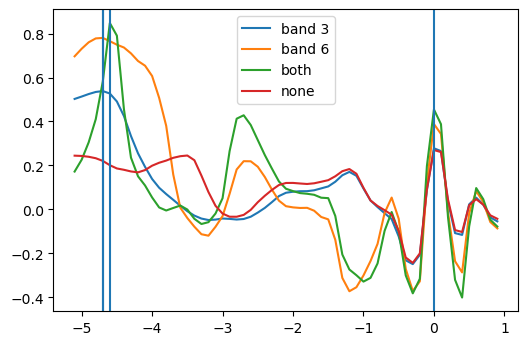

In [12]:
corr_3 = np.zeros(61)
corr_6 = np.zeros(61)
corr = np.zeros(61)
corr_0 = np.zeros(61)
for i in range(61):
    corr_3[i] = np.corrcoef(obs.dat[0,:,:330,-2,0].ravel(),mod_3.temp[0,:,:330,i].ravel())[0,1]
    corr_6[i] = np.corrcoef(obs.dat[0,:,:330,-2,0].ravel(),mod_6.temp[0,:,:330,i].ravel())[0,1]
    corr[i] = np.corrcoef(obs.dat[0,:,:330,-2,0].ravel(),mod.temp[0,:,:330,i].ravel())[0,1]
    corr_0[i] = np.corrcoef(obs.dat[0,:,:330,-2,0].ravel(),mod_0.temp[0,:,:330,i].ravel())[0,1]
plt.plot(mod.cmass[0,0,0],corr_3,label='band 3')
plt.plot(mod.cmass[0,0,0],corr_6,label='band 6')
plt.plot(mod.cmass[0,0,0],corr,label='both')
plt.plot(mod.cmass[0,0,0],corr_0,label='none')
plt.legend()
plt.axvline(np.argmax(corr_3)*0.1-5.1)
plt.axvline(np.argmax(corr_6)*0.1-5.1)
plt.axvline(np.argmax(corr)*0.1-5.1)
plt.axvline(np.argmax(corr_0)*0.1-5.1)

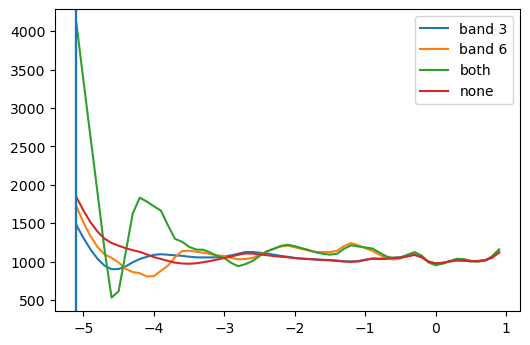

In [90]:
std_3 = np.zeros(61)
std_6 = np.zeros(61)
std = np.zeros(61)
std_0 = np.zeros(61)
for i in range(61):
    std_3[i] = np.std(obs.dat[0,:,:330,-2,0]*5900-mod_3.temp[0,:,:330,i])
    std_6[i] = np.std(obs.dat[0,:,:330,-2,0]*5900-mod_6.temp[0,:,:330,i])
    std[i] = np.std(obs.dat[0,:,:330,-2,0]*5900-mod.temp[0,:,:330,i])
    std_0[i] = np.std(obs.dat[0,:,:330,-2,0]*5900-mod_0.temp[0,:,:330,i])
plt.plot(mod.cmass[0,0,0],std_3,label='band 3')
plt.plot(mod.cmass[0,0,0],std_6,label='band 6')
plt.plot(mod.cmass[0,0,0],std,label='both')
plt.plot(mod.cmass[0,0,0],std_0,label='none')
plt.legend()
plt.axvline(np.argmax(std_3)*0.1-5.1)
plt.axvline(np.argmax(std_6)*0.1-5.1)
plt.axvline(np.argmax(std)*0.1-5.1)
plt.axvline(np.argmax(std_0)*0.1-5.1)

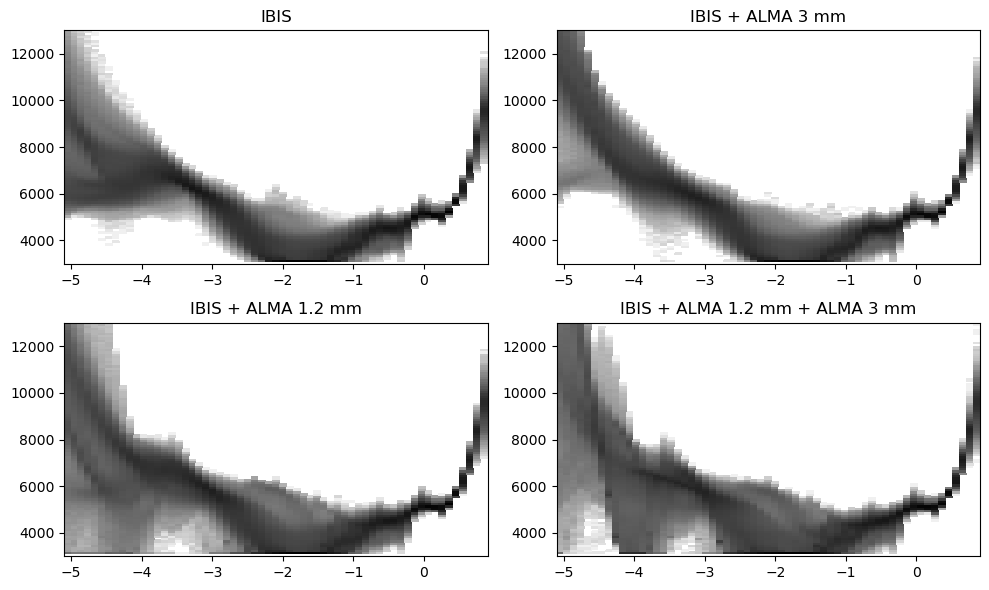

In [70]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.hist2d(mod.cmass.ravel(),mod_0.temp.ravel(),bins=[61,np.linspace(3000,13000,101)],\
           norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS')
plt.subplot(222)
plt.hist2d(mod.cmass.ravel(),mod_3.temp.ravel(),bins=[61,np.linspace(3000,13000,101)],\
           norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS + ALMA 3 mm')
plt.subplot(223)
plt.hist2d(mod.cmass.ravel(),mod_6.temp.ravel(),bins=[61,np.linspace(3000,13000,101)],\
           norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS + ALMA 1.2 mm')
plt.subplot(224)
plt.hist2d(mod.cmass.ravel(),mod.temp.ravel(),bins=[61,np.linspace(3000,13000,101)],\
           norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS + ALMA 1.2 mm + ALMA 3 mm')
plt.tight_layout()

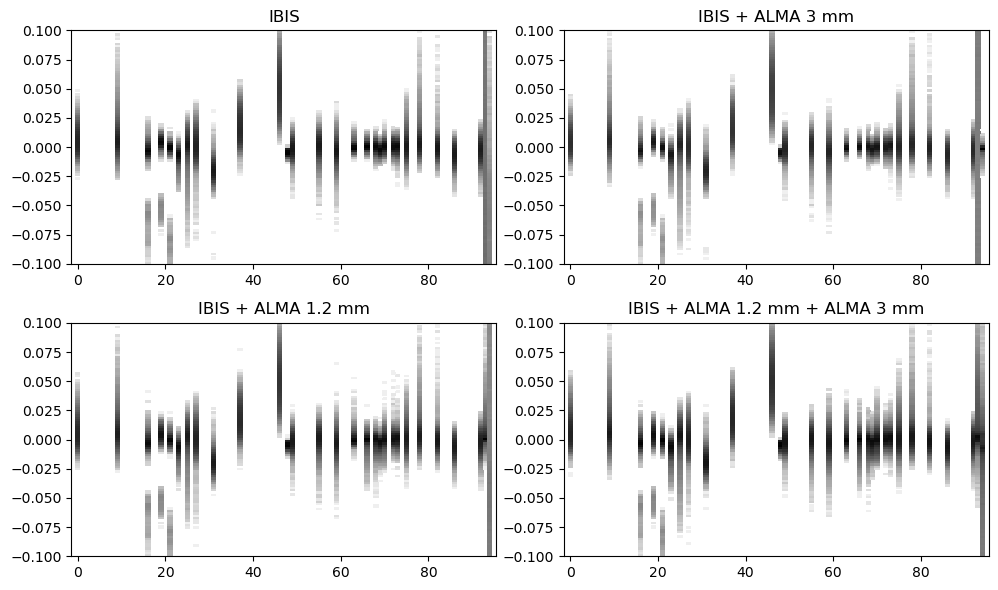

In [71]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.hist2d(ind.repeat(obs.nx*obs.ny),(fit_0.dat-obs.dat)[0,:,:,ind,0].ravel(),\
           bins=[np.arange(obs.nw+3)-1.5,np.linspace(-0.1,0.1,101)],norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS')
plt.subplot(222)
plt.hist2d(ind.repeat(obs.nx*obs.ny),(fit_3.dat-obs.dat)[0,:,:,ind,0].ravel(),\
           bins=[np.arange(obs.nw+3)-1.5,np.linspace(-0.1,0.1,101)],norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS + ALMA 3 mm')
plt.subplot(223)
plt.hist2d(ind.repeat(obs.nx*obs.ny),(fit_6.dat-obs.dat)[0,:,:,ind,0].ravel(),\
           bins=[np.arange(obs.nw+3)-1.5,np.linspace(-0.1,0.1,101)],norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS + ALMA 1.2 mm')
plt.subplot(224)
plt.hist2d(ind.repeat(obs.nx*obs.ny),(fit.dat-obs.dat)[0,:,:,ind,0].ravel(),\
           bins=[np.arange(obs.nw+3)-1.5,np.linspace(-0.1,0.1,101)],norm=LogNorm(),cmap='gist_yarg')
plt.title('IBIS + ALMA 1.2 mm + ALMA 3 mm')
plt.tight_layout()

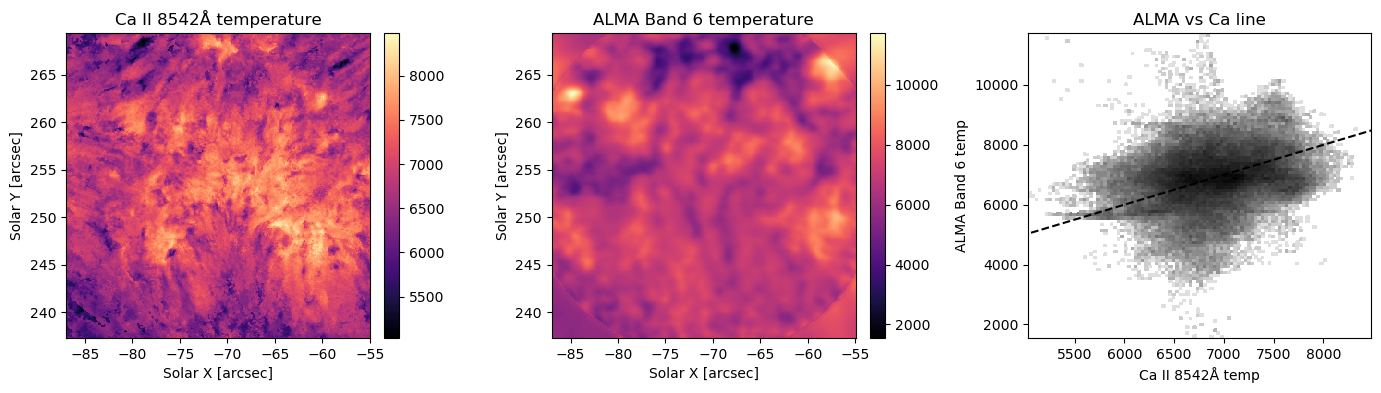

In [53]:
plt.figure(figsize=(14,4))
im_ca = mod_0.temp[0,:,:330,13]
im_alma = obs.dat[0,:,:330,-2,0]*5900
plt.subplot(131)
plt.imshow(im_ca,extent=[x0,x1,y0,y1],cmap='magma',origin='lower')
plt.xlabel('Solar X [arcsec]')
plt.ylabel('Solar Y [arcsec]')
plt.title('Ca II 8542Å temperature')
plt.colorbar(fraction=0.046,pad=0.04)
plt.subplot(132)
plt.imshow(im_alma,extent=[x0,x1,y0,y1],cmap='magma',origin='lower')
plt.xlabel('Solar X [arcsec]')
plt.ylabel('Solar Y [arcsec]')
plt.title('ALMA Band 6 temperature')
plt.colorbar(fraction=0.046,pad=0.04)
plt.subplot(133)
plt.hist2d(im_ca.ravel(),im_alma.ravel(),bins=[100,100],cmap='gist_yarg',norm=LogNorm())
plt.plot([4000,10000],[4000,10000],'--k')
plt.xlabel('Ca II 8542Å temp')
plt.ylabel('ALMA Band 6 temp')
plt.title('ALMA vs Ca line')
plt.tight_layout()
plt.savefig('ca_vs_band6.pdf')

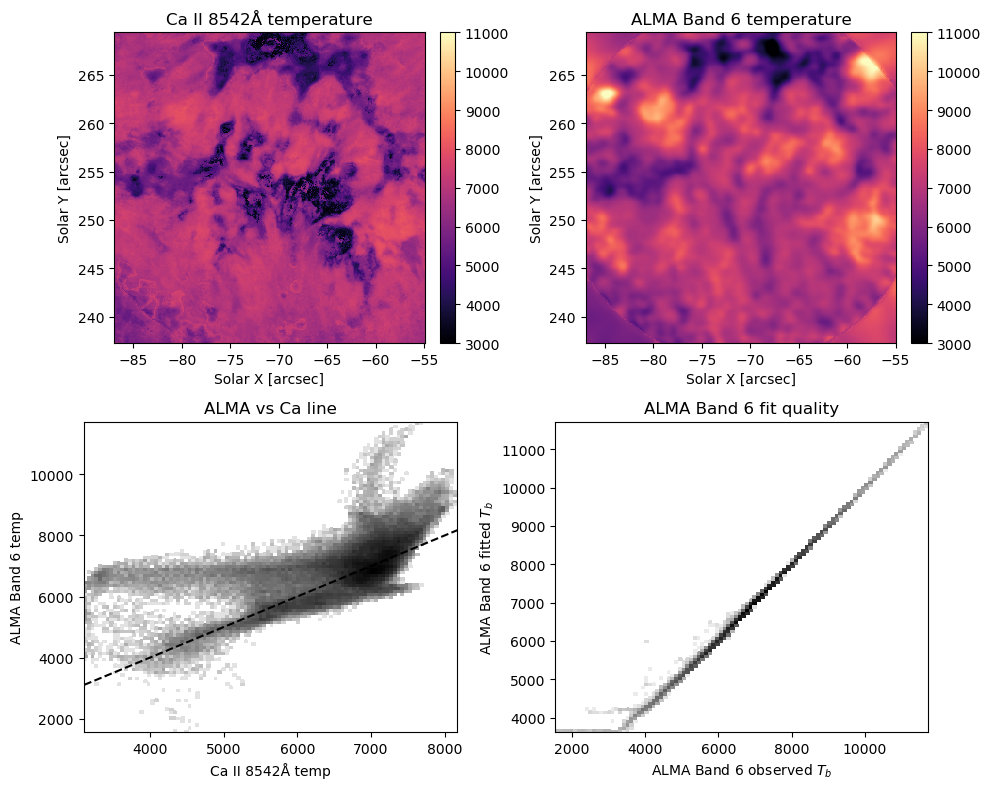

In [91]:
plt.figure(figsize=(10,8))
im_ca = mod_6.temp[0,:,:330,10]
im_alma = obs.dat[0,:,:330,-2,0]*5900
im_alma_fit = fit_6.dat[0,:,:330,-2,0]*5900
plt.subplot(221)
plt.imshow(im_ca,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=3000,vmax=11000)
plt.xlabel('Solar X [arcsec]')
plt.ylabel('Solar Y [arcsec]')
plt.title('Ca II 8542Å temperature')
plt.colorbar(fraction=0.046,pad=0.04)
plt.subplot(222)
plt.imshow(im_alma,extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=3000,vmax=11000)
plt.xlabel('Solar X [arcsec]')
plt.ylabel('Solar Y [arcsec]')
plt.title('ALMA Band 6 temperature')
plt.colorbar(fraction=0.046,pad=0.04)
plt.subplot(223)
plt.hist2d(im_ca.ravel(),im_alma.ravel(),bins=[100,100],cmap='gist_yarg',norm=LogNorm())
plt.plot([2000,10000],[2000,10000],'--k')
plt.xlabel('Ca II 8542Å temp')
plt.ylabel('ALMA Band 6 temp')
plt.title('ALMA vs Ca line')
plt.subplot(224)
plt.hist2d(im_alma.ravel(),im_alma_fit.ravel(),bins=[100,100],cmap='gist_yarg',norm=LogNorm())
plt.xlabel(r'ALMA Band 6 observed $T_b$')
plt.ylabel(r'ALMA Band 6 fitted $T_b$')
plt.title('ALMA Band 6 fit quality')
plt.tight_layout()
plt.savefig('ca6_vs_band6_2x2.pdf')

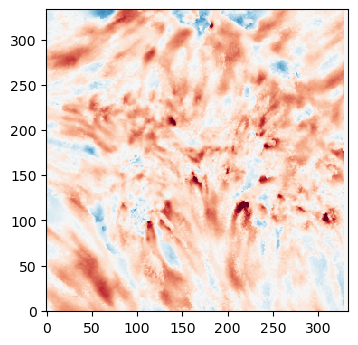

In [73]:
plt.imshow(mod_0.vlos[0,:,:,14]/1e5,cmap='RdBu_r',origin='lower',vmin=-5,vmax=5)

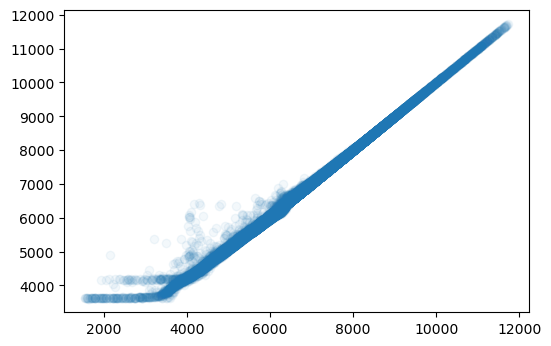

In [77]:
plt.scatter(obs.dat[0,:,:330,-2,0].ravel()*5900,fit_6.dat[0,:,:330,-2,0].ravel()*5900,alpha=0.05)